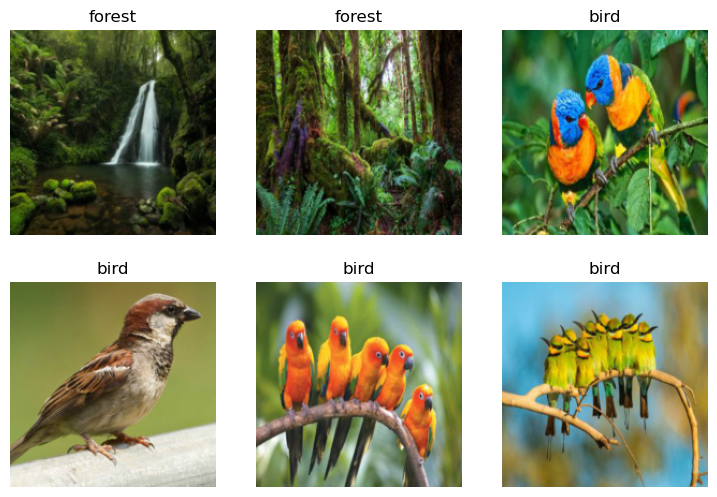

In [6]:
from duckduckgo_search import DDGS
from fastcore.all import *
from fastai.vision.all import *
from fastdownload import download_url
from PIL import Image
from pathlib import Path
import json, time

def search_images(keywords, max_images=200):
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

# Search and save the bird photos urls returned from search_images
urls = search_images('bird_photos', max_images=1)
urls[0]
# print(urls[0])

# Save bird photos to destination file
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

# Open the bird image to see what data we got
im = Image.open(dest)
im.to_thumb(256, 256)

# Searching, svaing, and viewing forest photos url returned from search_images
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256, 256)

# Saving each group of photos to different folders
searches = 'forest','bird'
path = Path('bird_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f' {o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

# Some photos might not be downloaded correctly for the model training, so we will remove them
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

# Training our image classifier model
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

# Visually confirming our data looks right before training
dls.show_batch(max_n=6)

In [7]:
from duckduckgo_search import DDGS
from fastcore.all import *
from fastai.vision.all import *
from fastdownload import download_url
from PIL import Image
from pathlib import Path
import json, time

def search_images(keywords, max_images=200):
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

# Search and save the bird photos urls returned from search_images
urls = search_images('bird_photos', max_images=1)
urls[0]
# print(urls[0])

# Save bird photos to destination file
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

# Open the bird image to see what data we got
im = Image.open(dest)
im.to_thumb(256, 256)

# Searching, svaing, and viewing forest photos url returned from search_images
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256, 256)

# Saving each group of photos to different folders
searches = 'forest','bird'
path = Path('bird_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f' {o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

# Some photos might not be downloaded correctly for the model training, so we will remove them
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

# Training our image classifier model
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

# Visually confirming our data looks right before training
# dls.show_batch(max_n=6)

# Training our model using resnet18
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\user/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:33<00:00, 1.39MB/s]


In [1]:
from duckduckgo_search import DDGS
from fastcore.all import *
from fastai.vision.all import *
from fastdownload import download_url
from PIL import Image
from pathlib import Path
import json, time

def search_images(keywords, max_images=200):
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

# Search and save the bird photos urls returned from search_images
urls = search_images('bird_photos', max_images=1)
urls[0]
# print(urls[0])

# Save bird photos to destination file
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

# Open the bird image to see what data we got
im = Image.open(dest)
im.to_thumb(256, 256)

# Searching, svaing, and viewing forest photos url returned from search_images
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256, 256)

# Saving each group of photos to different folders
searches = 'forest','bird'
path = Path('bird_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f' {o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

# Some photos might not be downloaded correctly for the model training, so we will remove them
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

# Training our image classifier model
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

# Visually confirming our data looks right before training
# dls.show_batch(max_n=6)

# Training our model using resnet18
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

# Exporting the model
learn.export('model.pkl')

In [ ]:
import gradio as gr
from PIL import Image

def predict(img):
    pred, _, probs = learn.predict(img)
    return {pred: float(probs.max())}

demo = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(),
    title="Bird or Not?",
    description="Upload a photo to classify whether it's a forest or bird.",
)

demo.launch()